In [18]:
!pip install pyforest

  Created wheel for pyforest: filename=pyforest-1.0.3-py2.py3-none-any.whl size=13716 sha256=224f88c9f94323f2234e8acb4ba71471253af3b08fcf52efcb2e60179aa5d55e
  Stored in directory: /Users/heymanjake/Library/Caches/pip/wheels/69/19/d8/99d36becc4f191c2d9b36cab597549f25b00189a9ce17c7117
Successfully built pyforest


In [19]:
import pyforest
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series
import numpy as np

***Import data set***


In [3]:
series = pd.read_csv('data/country_vaccinations.csv', header=0)

In [4]:
series.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Albania,ALB,2021-01-10,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
1,Albania,ALB,2021-01-11,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
2,Albania,ALB,2021-01-12,128.0,128.0,NaN,NaN,64.0,0.00,0.00,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
3,Albania,ALB,2021-01-13,188.0,188.0,NaN,60.0,63.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
4,Albania,ALB,2021-01-14,266.0,266.0,NaN,78.0,66.0,0.01,0.01,NaN,23.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...


Check Data types

In [25]:
series.dtypes

country                                 object
iso_code                                object
date                                    object
total_vaccinations                     float64
people_vaccinated                      float64
people_fully_vaccinated                float64
daily_vaccinations_raw                 float64
daily_vaccinations                     float64
total_vaccinations_per_hundred         float64
people_vaccinated_per_hundred          float64
people_fully_vaccinated_per_hundred    float64
daily_vaccinations_per_million         float64
vaccines                                object
source_name                             object
source_website                          object
dtype: object

Convert Datetime 

In [27]:
series.date = pd.to_datetime(series['date'])

In [28]:
series.dtypes

country                                        object
iso_code                                       object
date                                   datetime64[ns]
total_vaccinations                            float64
people_vaccinated                             float64
people_fully_vaccinated                       float64
daily_vaccinations_raw                        float64
daily_vaccinations                            float64
total_vaccinations_per_hundred                float64
people_vaccinated_per_hundred                 float64
people_fully_vaccinated_per_hundred           float64
daily_vaccinations_per_million                float64
vaccines                                       object
source_name                                    object
source_website                                 object
dtype: object

In [33]:
series.country.describe()

count          4678
unique          118
top       Lithuania
freq             84
Name: country, dtype: object

Plot Missing Data

<IPython.core.display.Javascript object>

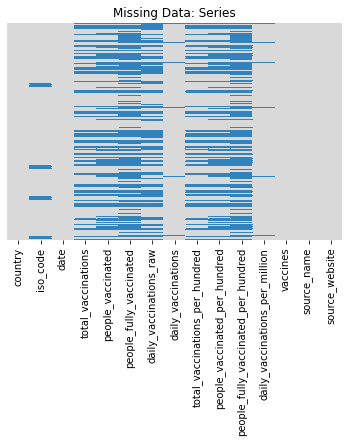

In [43]:
sns.heatmap(series.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')
plt.title('Missing Data: Series')
plt.show()

See percentages of missing data

In [44]:
total_rows = series.shape[0]
null_count = series.isnull().sum()

null_count_pct = (null_count/total_rows)*100
null_count_pct

country                                 0.000000
iso_code                                6.669517
date                                    0.000000
total_vaccinations                     34.715690
people_vaccinated                      44.527576
people_fully_vaccinated                62.676357
daily_vaccinations_raw                 44.933732
daily_vaccinations                      3.420265
total_vaccinations_per_hundred         34.715690
people_vaccinated_per_hundred          44.527576
people_fully_vaccinated_per_hundred    62.676357
daily_vaccinations_per_million          3.420265
vaccines                                0.000000
source_name                             0.000000
source_website                          0.000000
dtype: float64

Create table of missing value percentages

In [46]:
pd.DataFrame(null_count_pct ,columns = ["null_count_pct"])

,null_count_pct
country,0.000000
iso_code,6.669517
date,0.000000
total_vaccinations,34.715690
people_vaccinated,44.527576
people_fully_vaccinated,62.676357
daily_vaccinations_raw,44.933732
daily_vaccinations,3.420265
total_vaccinations_per_hundred,34.715690
people_vaccinated_per_hundred,44.527576


In [47]:
series["iso_code"].isnull().sum()

312

In [50]:
series.loc[series["iso_code"].isnull() , ["country"]].value_counts()

country         
Wales               78
Scotland            78
Northern Ireland    78
England             78
dtype: int64

In [55]:
series["country"].value_counts().head(10)


Lithuania           84
Wales               78
Scotland            78
Northern Ireland    78
England             78
United Kingdom      78
Russia              77
Israel              73
United States       72
Bahrain             69
Name: country, dtype: int64

In [57]:
rename_country = ["England" , "Wales" , "Scotland" , "Northern Ireland"]

for i in rename_country:
#     print(i)
     series["country"] = series["country"].str.replace(i , "United Kingdom")

In [59]:
series["country"].value_counts().head(10)

United Kingdom    390
Lithuania          84
Russia             77
Israel             73
United States      72
Bahrain            69
Chile              68
Mexico             68
Costa Rica         68
Italy              65
Name: country, dtype: int64